# Educational Stock & Commodity Price Prediction System
## Complete Report: Dataset Preprocessing, Analysis, Model Development & Comparison

**Project Type:** Academic Demonstration of Predictive Analytics  
**Disclaimer:** This is NOT a trading system and NOT financial advice.  
**Purpose:** Demonstrate end-to-end ML pipeline for educational evaluation.

---


## 1. Dataset Preprocessing

### 1.1 Data Loading & Initial Inspection


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Reproducibility
np.random.seed(42)

print("Libraries imported successfully.")


Libraries imported successfully.


In [ ]:
# Load all datasets
import os

# Data directory path
data_dir = r'C:\Users\PRATYAY DAS\Downloads\Project\data'

print(f"Loading data from: {data_dir}")

datasets = {
    'BankNifty': os.path.join(data_dir, 'BANKNIFTY_FUT.csv'),
    'Nifty': os.path.join(data_dir, 'NIFTY_FUT.csv'),
    'Gold': os.path.join(data_dir, 'GOLD_FUT.csv'),
    'Silver': os.path.join(data_dir, 'SILVER_FUT.csv'),
    'Crude Oil': os.path.join(data_dir, 'CRUDEOIL_FUT.csv'),
    'Natural Gas': os.path.join(data_dir, 'NATURALGAS_FUT.csv')
}

raw_data = {}
for name, path in datasets.items():
    if os.path.exists(path):
        df = pd.read_csv(path)
        raw_data[name] = df
        print(f"✓ {name}: {len(df)} rows, {df.shape[1]} columns")
        print(f"  Date range: {df['datetime'].min()} to {df['datetime'].max()}")
        print(f"  Columns: {list(df.columns)}\n")
    else:
        print(f"✗ Warning: {name} file not found at {path}")

print(f"\nSuccessfully loaded {len(raw_data)} datasets.")


Loading data from: C:\Users\PRATYAY DAS\Downloads\Project\data
✓ BankNifty: 289482 rows, 8 columns
  Date range: 2021-07-01 09:15:00 to 2025-01-20 15:29:00
  Columns: ['datetime', 'tradingsymbol', 'expiry', 'open', 'high', 'low', 'close', 'volume']

✓ Nifty: 289483 rows, 8 columns
  Date range: 2021-07-01 09:15:00 to 2025-01-20 15:29:00
  Columns: ['datetime', 'tradingsymbol', 'expiry', 'open', 'high', 'low', 'close', 'volume']

✓ Gold: 547532 rows, 8 columns
  Date range: 2021-07-01 09:00:00 to 2025-01-20 23:54:00
  Columns: ['datetime', 'tradingsymbol', 'expiry', 'open', 'high', 'low', 'close', 'volume']

✓ Silver: 547846 rows, 8 columns
  Date range: 2021-07-01 09:31:00 to 2025-01-20 23:54:00
  Columns: ['datetime', 'tradingsymbol', 'expiry', 'open', 'high', 'low', 'close', 'volume']

✓ Crude Oil: 555564 rows, 8 columns
  Date range: 2021-07-01 09:00:00 to 2025-01-20 23:54:00
  Columns: ['datetime', 'tradingsymbol', 'expiry', 'open', 'high', 'low', 'close', 'volume']

✓ Natural Gas:

### 1.2 Data Cleaning & Preprocessing Steps

**General Description:**  
The raw data contains intraday futures prices. We need to:
1. Convert datetime to proper format
2. Extract End-of-Day (EOD) closing prices
3. Handle missing values
4. Sort chronologically
5. Validate data consistency

**Specific Requirements:**
- Parse datetime column correctly
- Group by date and extract last price of each trading day (EOD)
- Remove duplicates and handle gaps
- Ensure no look-ahead bias in preprocessing


In [10]:
def preprocess_data(df, instrument_name):
    """
    Comprehensive preprocessing function:
    1. Parse datetime
    2. Extract EOD prices
    3. Clean and validate
    """
    df_clean = df.copy()
    
    # Step 1: Parse datetime
    df_clean['datetime'] = pd.to_datetime(df_clean['datetime'])
    df_clean['date'] = df_clean['datetime'].dt.date
    
    # Step 2: Extract EOD (last price of each trading day)
    eod = df_clean.groupby('date').agg({
        'open': 'first',
        'high': 'max',
        'low': 'min',
        'close': 'last',
        'volume': 'sum'
    }).reset_index()
    
    # Step 3: Convert date back to datetime for sorting
    eod['date'] = pd.to_datetime(eod['date'])
    eod = eod.sort_values('date').reset_index(drop=True)
    
    # Step 4: Handle missing values
    eod = eod.dropna(subset=['close'])
    
    # Step 5: Validate (check for negative prices, etc.)
    eod = eod[eod['close'] > 0]
    
    print(f"\n{instrument_name} - Preprocessing Summary:")
    print(f"  Original rows: {len(df_clean)}")
    print(f"  EOD rows: {len(eod)}")
    print(f"  Date range: {eod['date'].min()} to {eod['date'].max()}")
    print(f"  Missing values: {eod.isnull().sum().sum()}")
    
    return eod

# Preprocess all datasets
processed_data = {}
for name, df in raw_data.items():
    processed_data[name] = preprocess_data(df, name)



BankNifty - Preprocessing Summary:
  Original rows: 289482
  EOD rows: 776
  Date range: 2021-07-01 00:00:00 to 2025-01-20 00:00:00
  Missing values: 0

Nifty - Preprocessing Summary:
  Original rows: 289483
  EOD rows: 776
  Date range: 2021-07-01 00:00:00 to 2025-01-20 00:00:00
  Missing values: 0

Gold - Preprocessing Summary:
  Original rows: 547532
  EOD rows: 650
  Date range: 2021-07-01 00:00:00 to 2025-01-20 00:00:00
  Missing values: 0

Silver - Preprocessing Summary:
  Original rows: 547846
  EOD rows: 647
  Date range: 2021-07-01 00:00:00 to 2025-01-20 00:00:00
  Missing values: 0

Crude Oil - Preprocessing Summary:
  Original rows: 555564
  EOD rows: 650
  Date range: 2021-07-01 00:00:00 to 2025-01-20 00:00:00
  Missing values: 0

Natural Gas - Preprocessing Summary:
  Original rows: 554721
  EOD rows: 649
  Date range: 2021-07-01 00:00:00 to 2025-01-20 00:00:00
  Missing values: 0


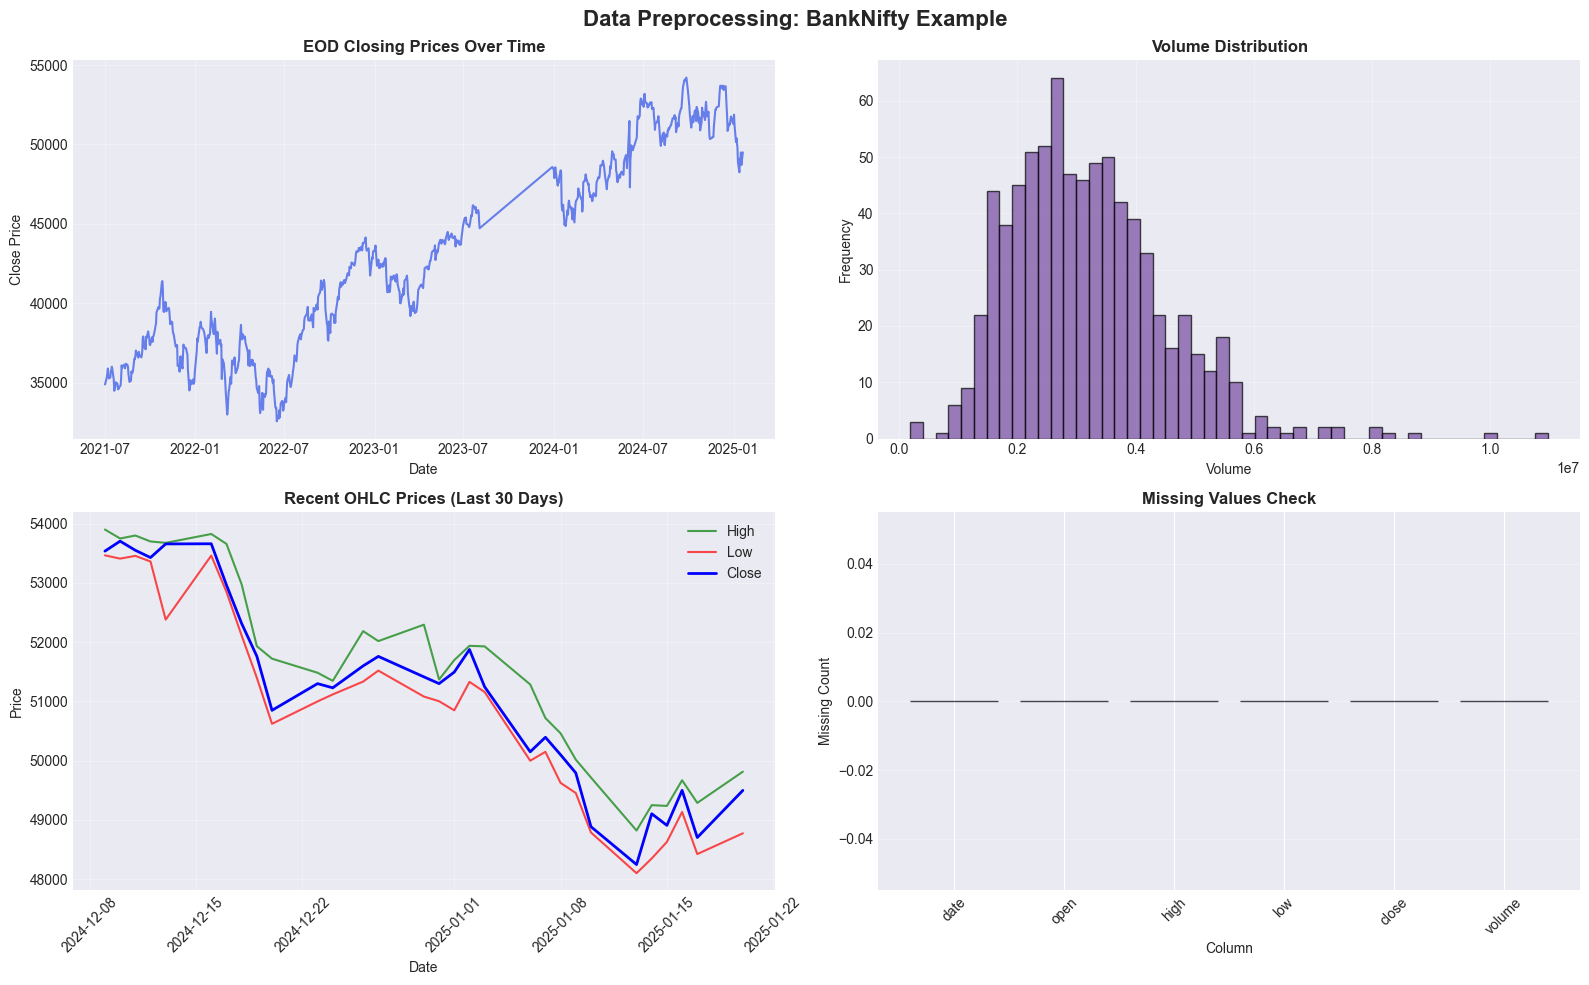


Preprocessing visualization saved.


In [11]:
# Visualize preprocessing results: Sample of one instrument
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Data Preprocessing: BankNifty Example', fontsize=16, fontweight='bold')

sample = processed_data['BankNifty']

# 1. Time series of closing prices
axes[0, 0].plot(sample['date'], sample['close'], linewidth=1.5, color='#667eea')
axes[0, 0].set_title('EOD Closing Prices Over Time', fontweight='bold')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Close Price')
axes[0, 0].grid(True, alpha=0.3)

# 2. Volume distribution
axes[0, 1].hist(sample['volume'], bins=50, color='#764ba2', alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Volume Distribution', fontweight='bold')
axes[0, 1].set_xlabel('Volume')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True, alpha=0.3)

# 3. OHLC for recent period
recent = sample.tail(30)
axes[1, 0].plot(recent['date'], recent['high'], label='High', color='green', alpha=0.7)
axes[1, 0].plot(recent['date'], recent['low'], label='Low', color='red', alpha=0.7)
axes[1, 0].plot(recent['date'], recent['close'], label='Close', color='blue', linewidth=2)
axes[1, 0].set_title('Recent OHLC Prices (Last 30 Days)', fontweight='bold')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Price')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Data quality check: Missing values per column
missing = sample.isnull().sum()
axes[1, 1].bar(missing.index, missing.values, color='#4facfe', alpha=0.7, edgecolor='black')
axes[1, 1].set_title('Missing Values Check', fontweight='bold')
axes[1, 1].set_xlabel('Column')
axes[1, 1].set_ylabel('Missing Count')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('preprocessing_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nPreprocessing visualization saved.")


## 2. Analysis on Dataset (for each objective)

### 2.1 General Description

**Objective:** Predict the next trading day's End-of-Day (EOD) closing price using historical price data.

**Dataset Characteristics:**
- **Type:** Time-series financial data (futures contracts)
- **Instruments:** 6 (BankNifty, Nifty, Gold, Silver, Crude Oil, Natural Gas)
- **Features:** datetime, open, high, low, close, volume
- **Time Period:** 01-07-2021 to 20-01-2025
- **Frequency:** Daily (EOD aggregated from intraday data)


### 2.2 Specific Requirements

**Analysis Requirements:**
1. **Exploratory Data Analysis (EDA):**
   - Statistical summary of all instruments
   - Price distribution analysis
   - Volatility analysis
   - Correlation analysis

2. **Feature Engineering:**
   - Create lag features (past prices)
   - Calculate technical indicators (MA, RSI, MACD)
   - Compute returns and volatility

3. **Time-Series Characteristics:**
   - Check for stationarity
   - Identify trends and seasonality
   - Analyze autocorrelation


In [12]:
# Statistical Summary for all instruments
summary_stats = []
for name, df in processed_data.items():
    stats = {
        'Instrument': name,
        'Count': len(df),
        'Mean Close': df['close'].mean(),
        'Std Close': df['close'].std(),
        'Min Close': df['close'].min(),
        'Max Close': df['close'].max(),
        'Mean Volume': df['volume'].mean(),
        'Date Range': f"{df['date'].min()} to {df['date'].max()}"
    }
    summary_stats.append(stats)

summary_df = pd.DataFrame(summary_stats)
print("\n=== Statistical Summary of All Instruments ===")
print(summary_df.to_string(index=False))



=== Statistical Summary of All Instruments ===
 Instrument  Count   Mean Close    Std Close  Min Close  Max Close  Mean Volume                                 Date Range
  BankNifty    776 42754.451289  5980.149793    32565.0    54204.1 3.186196e+06 2021-07-01 00:00:00 to 2025-01-20 00:00:00
      Nifty    776 19535.906121  3030.349153    15339.8    26346.1 7.996633e+06 2021-07-01 00:00:00 to 2025-01-20 00:00:00
       Gold    650 56440.703077  9177.902965    45584.0    79193.0 5.472971e+03 2021-07-01 00:00:00 to 2025-01-20 00:00:00
     Silver    647 69047.689335 10192.212335    52072.0    97390.0 1.436094e+04 2021-07-01 00:00:00 to 2025-01-20 00:00:00
  Crude Oil    650  6528.895385   957.019197     4638.0     9600.0 4.282118e+04 2021-07-01 00:00:00 to 2025-01-20 00:00:00
Natural Gas    649   345.095840   162.641697      129.7      749.2 8.795191e+04 2021-07-01 00:00:00 to 2025-01-20 00:00:00


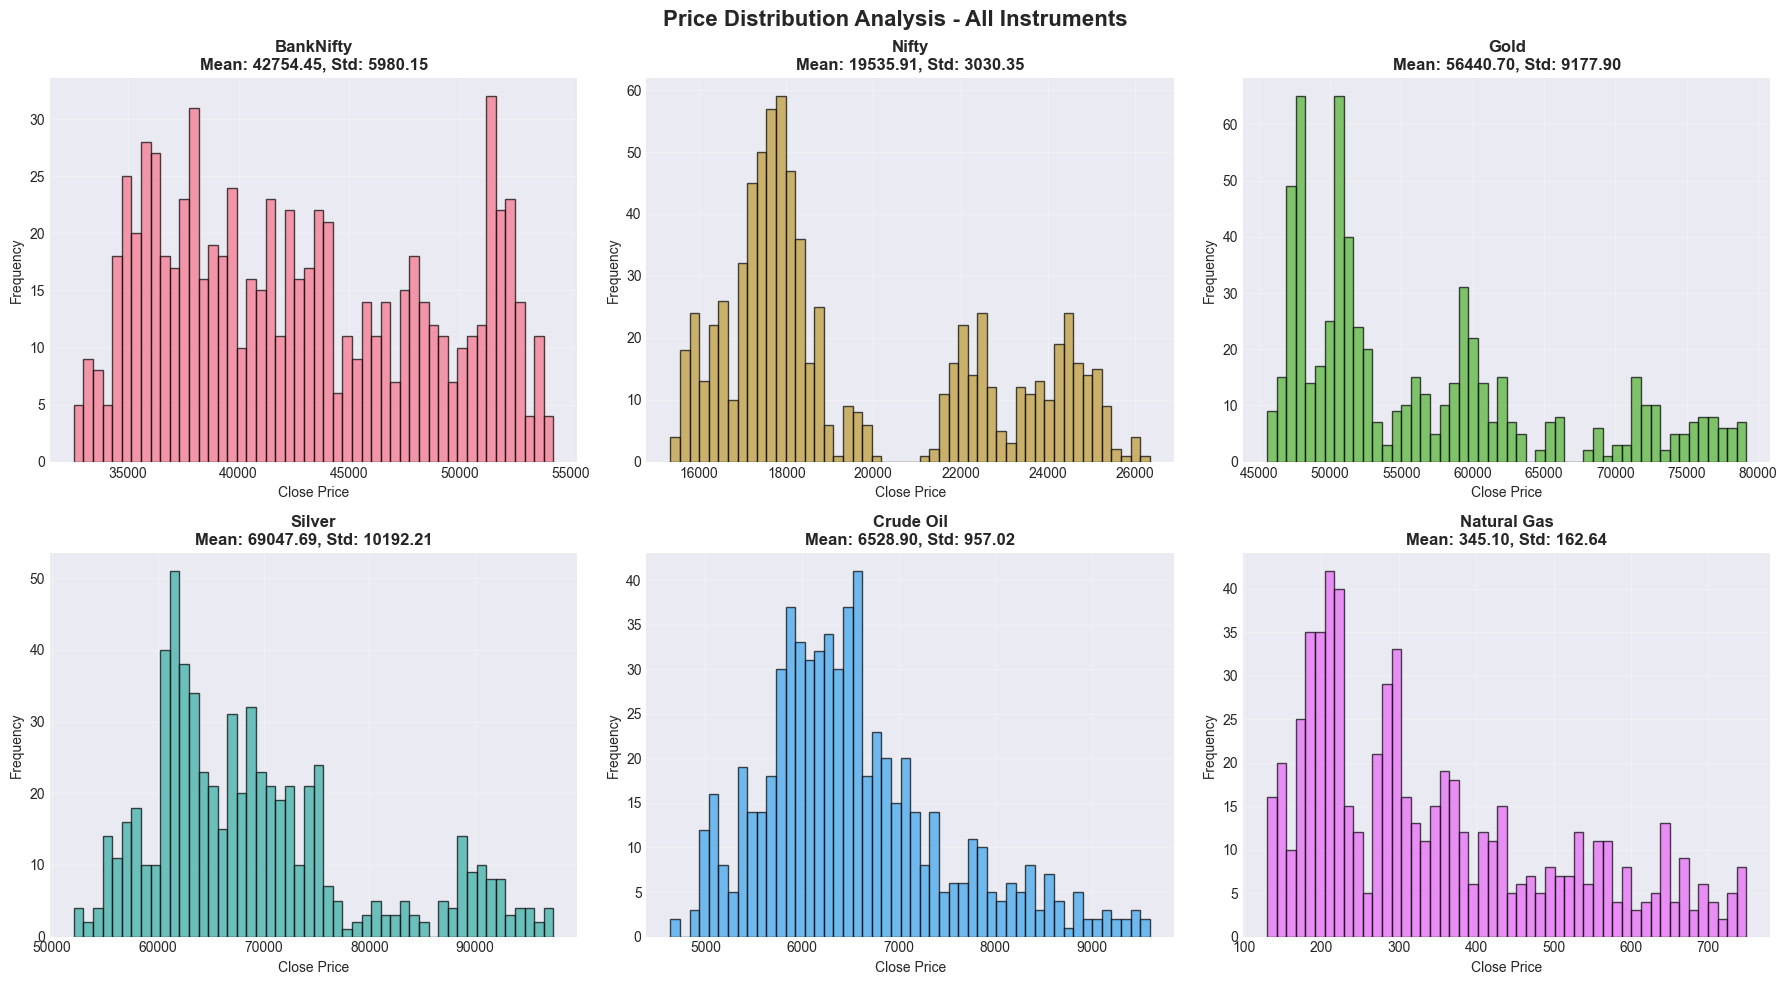

In [13]:
# Price Distribution Analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Price Distribution Analysis - All Instruments', fontsize=16, fontweight='bold')

axes_flat = axes.flatten()
for idx, (name, df) in enumerate(processed_data.items()):
    axes_flat[idx].hist(df['close'], bins=50, color=sns.color_palette("husl")[idx], 
                        alpha=0.7, edgecolor='black')
    axes_flat[idx].set_title(f'{name}\nMean: {df["close"].mean():.2f}, Std: {df["close"].std():.2f}', 
                            fontweight='bold')
    axes_flat[idx].set_xlabel('Close Price')
    axes_flat[idx].set_ylabel('Frequency')
    axes_flat[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('price_distribution_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


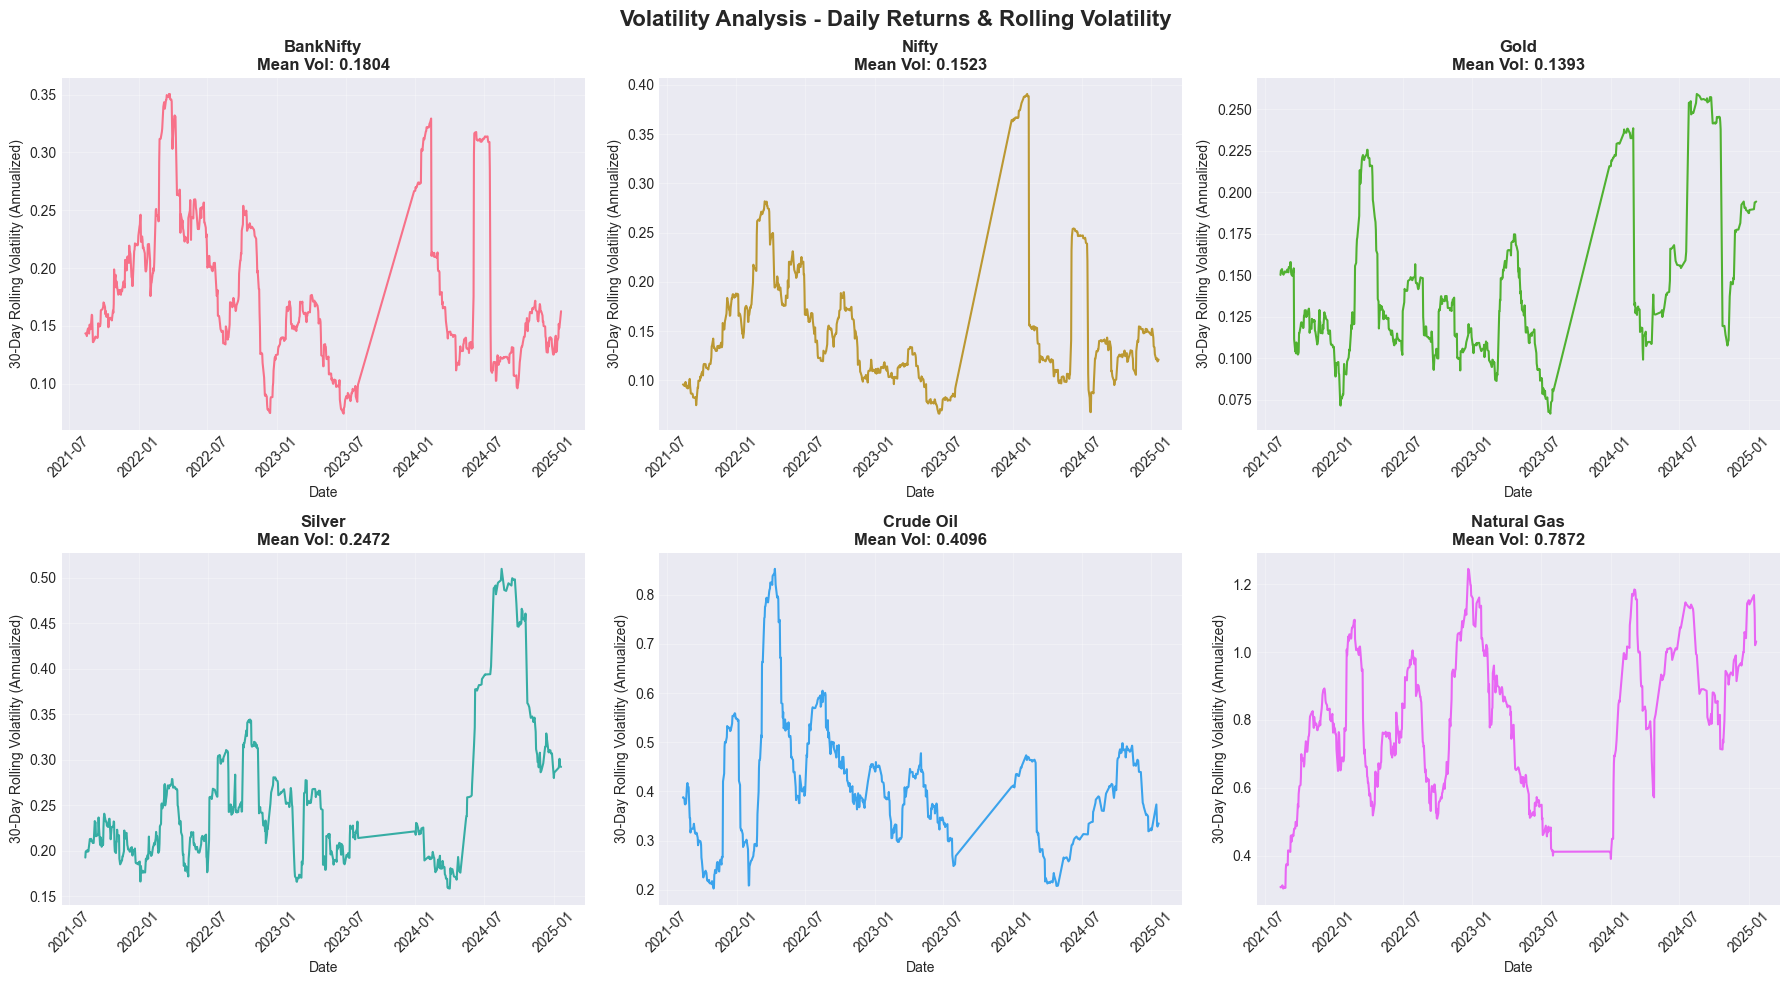

In [14]:
# Volatility Analysis: Calculate daily returns and rolling volatility
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Volatility Analysis - Daily Returns & Rolling Volatility', fontsize=16, fontweight='bold')

axes_flat = axes.flatten()
for idx, (name, df) in enumerate(processed_data.items()):
    df_vol = df.copy()
    df_vol['returns'] = df_vol['close'].pct_change()
    df_vol['volatility_30d'] = df_vol['returns'].rolling(30).std() * np.sqrt(252)  # Annualized
    
    axes_flat[idx].plot(df_vol['date'], df_vol['volatility_30d'], 
                        color=sns.color_palette("husl")[idx], linewidth=1.5)
    axes_flat[idx].set_title(f'{name}\nMean Vol: {df_vol["volatility_30d"].mean():.4f}', 
                            fontweight='bold')
    axes_flat[idx].set_xlabel('Date')
    axes_flat[idx].set_ylabel('30-Day Rolling Volatility (Annualized)')
    axes_flat[idx].grid(True, alpha=0.3)
    axes_flat[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('volatility_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


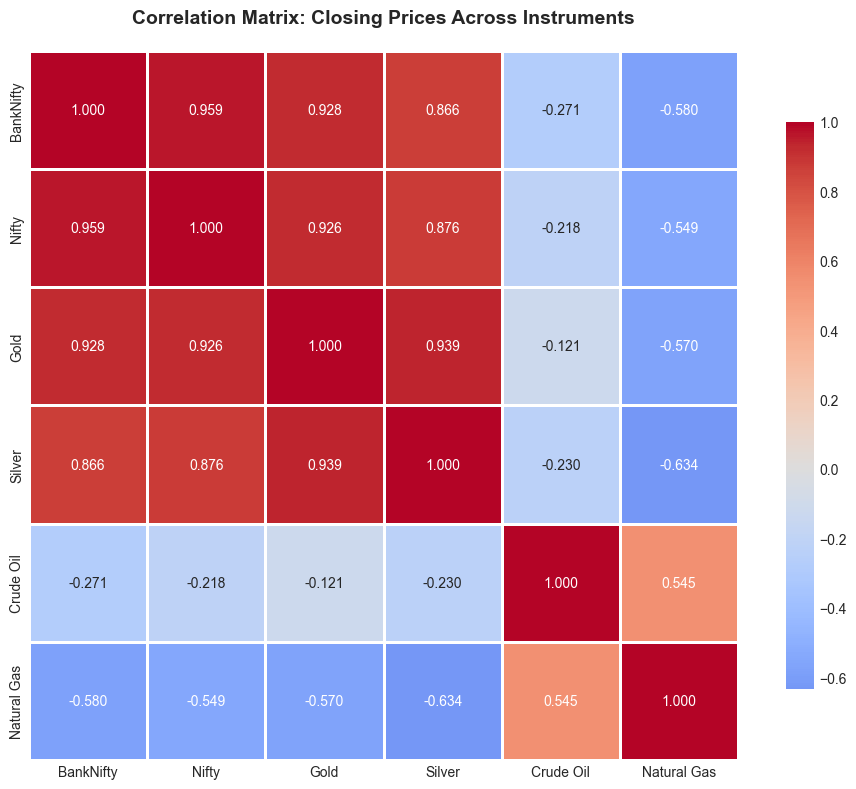


=== Correlation Matrix ===
             BankNifty     Nifty      Gold    Silver  Crude Oil  Natural Gas
BankNifty     1.000000  0.959106  0.927581  0.866426  -0.271352     -0.58021
Nifty         0.959106  1.000000  0.925915  0.876146  -0.218426     -0.54904
Gold          0.927581  0.925915  1.000000  0.938621  -0.121136     -0.57049
Silver        0.866426  0.876146  0.938621  1.000000  -0.230158     -0.63418
Crude Oil    -0.271352 -0.218426 -0.121136 -0.230158   1.000000      0.54534
Natural Gas  -0.580210 -0.549040 -0.570490 -0.634180   0.545340      1.00000


In [15]:
# Correlation Analysis: Compare instruments
# Create a matrix of closing prices across instruments
close_prices = pd.DataFrame()
for name, df in processed_data.items():
    close_prices[name] = df.set_index('date')['close']

# Align dates (forward fill then drop remaining NaN)
close_prices = close_prices.ffill().dropna()

# Calculate correlation matrix
corr_matrix = close_prices.corr()

# Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix: Closing Prices Across Instruments', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n=== Correlation Matrix ===")
print(corr_matrix)


### 2.3 Feature Engineering

**Analysis Results:** Creating features for predictive modeling


In [ ]:
def create_features(df, window_size=10):
   
    df_feat = df.copy()
    
    # Lag features
    for lag in range(1, window_size + 1):
        df_feat[f'lag_{lag}'] = df_feat['close'].shift(lag)
    
    # Moving averages
    df_feat['ma_5'] = df_feat['close'].rolling(5).mean()
    df_feat['ma_10'] = df_feat['close'].rolling(10).mean()
    df_feat['ma_20'] = df_feat['close'].rolling(20).mean()
    
    # Returns
    df_feat['returns'] = df_feat['close'].pct_change()
    df_feat['returns_lag1'] = df_feat['returns'].shift(1)
    
    # Volatility
    df_feat['volatility_10'] = df_feat['returns'].rolling(10).std()
    
    # RSI (Relative Strength Index)
    delta = df_feat['close'].diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    avg_gain = gain.rolling(14).mean()
    avg_loss = loss.rolling(14).mean()
    rs = avg_gain / avg_loss
    df_feat['rsi'] = 100 - (100 / (1 + rs))
    
    # MACD
    ema_12 = df_feat['close'].ewm(span=12, adjust=False).mean()
    ema_26 = df_feat['close'].ewm(span=26, adjust=False).mean()
    df_feat['macd'] = ema_12 - ema_26
    df_feat['macd_signal'] = df_feat['macd'].ewm(span=9, adjust=False).mean()
    
    # Volume features
    df_feat['volume_ma_10'] = df_feat['volume'].rolling(10).mean()
    df_feat['volume_ratio'] = df_feat['volume'] / df_feat['volume_ma_10']
    
    # Target: Next day's close
    df_feat['target'] = df_feat['close'].shift(-1)
    
    return df_feat

# Create features for all instruments
featured_data = {}
for name, df in processed_data.items():
    featured_data[name] = create_features(df, window_size=10)
    print(f"{name}: Created {len([c for c in featured_data[name].columns if 'lag' in c or 'ma' in c or 'rsi' in c])} features")

print("\nFeature engineering complete.")


BankNifty: Created 18 features
Nifty: Created 18 features
Gold: Created 18 features
Silver: Created 18 features
Crude Oil: Created 18 features
Natural Gas: Created 18 features

Feature engineering complete.


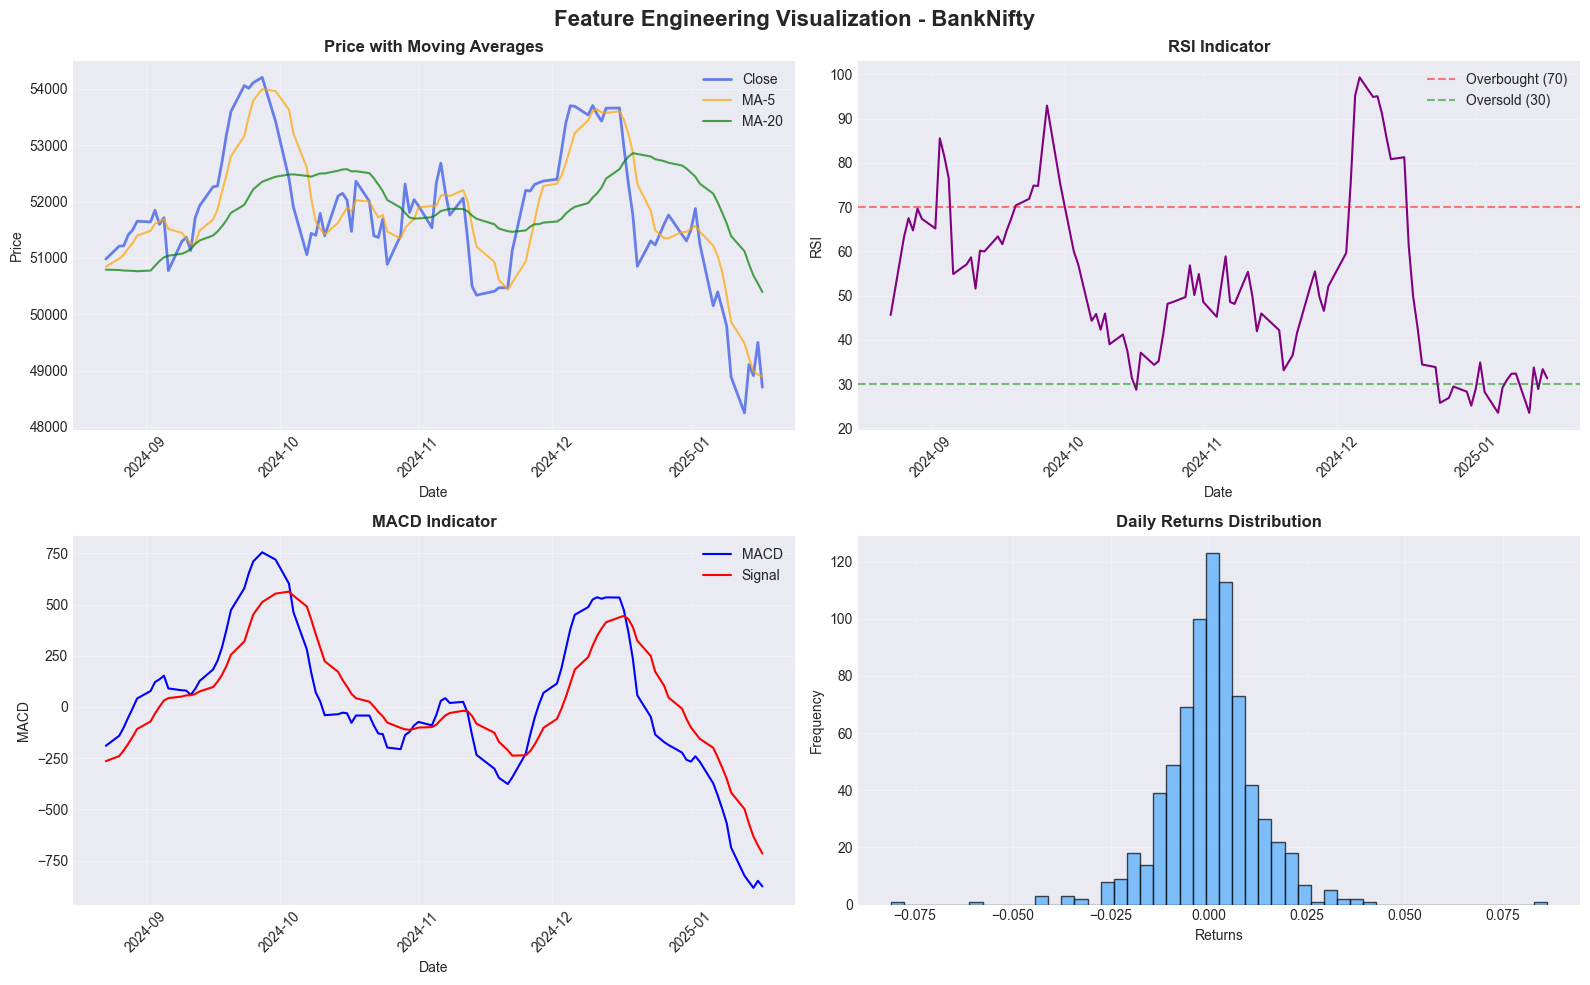

In [17]:
# Visualize feature importance: Sample instrument (BankNifty)
sample_feat = featured_data['BankNifty'].dropna()

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Feature Engineering Visualization - BankNifty', fontsize=16, fontweight='bold')

# 1. Price with Moving Averages
recent = sample_feat.tail(100)
axes[0, 0].plot(recent['date'], recent['close'], label='Close', linewidth=2, color='#667eea')
axes[0, 0].plot(recent['date'], recent['ma_5'], label='MA-5', alpha=0.7, color='orange')
axes[0, 0].plot(recent['date'], recent['ma_20'], label='MA-20', alpha=0.7, color='green')
axes[0, 0].set_title('Price with Moving Averages', fontweight='bold')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Price')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. RSI
axes[0, 1].plot(recent['date'], recent['rsi'], color='purple', linewidth=1.5)
axes[0, 1].axhline(y=70, color='r', linestyle='--', alpha=0.5, label='Overbought (70)')
axes[0, 1].axhline(y=30, color='g', linestyle='--', alpha=0.5, label='Oversold (30)')
axes[0, 1].set_title('RSI Indicator', fontweight='bold')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('RSI')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. MACD
axes[1, 0].plot(recent['date'], recent['macd'], label='MACD', linewidth=1.5, color='blue')
axes[1, 0].plot(recent['date'], recent['macd_signal'], label='Signal', linewidth=1.5, color='red')
axes[1, 0].set_title('MACD Indicator', fontweight='bold')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('MACD')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Returns Distribution
axes[1, 1].hist(sample_feat['returns'].dropna(), bins=50, color='#4facfe', alpha=0.7, edgecolor='black')
axes[1, 1].set_title('Daily Returns Distribution', fontweight='bold')
axes[1, 1].set_xlabel('Returns')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('feature_engineering_visualization.png', dpi=300, bbox_inches='tight')
plt.show()


## 3. Model Development

**Minimum three predictive models must be trained.**

We will train:
1. **Linear Regression** (Baseline - Simple, interpretable)
2. **Polynomial Regression (Degree 2)** (Captures non-linear relationships)
3. **Random Forest Regressor** (Ensemble method, handles non-linearity)
4. **LSTM Neural Network** (Experimental - Sequence modeling)

**Note:** All models predict the next trading day's EOD close price.


In [18]:
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prepare modeling data for ALL instruments
print("=== Preparing Data for All Instruments ===\n")
modeling_datasets = {}
for name, df_feat in featured_data.items():
    df_clean = df_feat.copy().dropna()
    if len(df_clean) > 50:  # Ensure enough data
        modeling_datasets[name] = df_clean
        print(f"{name}: {len(df_clean)} samples ready for modeling")

print(f"\nTotal instruments for modeling: {len(modeling_datasets)}")


=== Preparing Data for All Instruments ===

BankNifty: 756 samples ready for modeling
Nifty: 756 samples ready for modeling
Gold: 630 samples ready for modeling
Silver: 627 samples ready for modeling
Crude Oil: 630 samples ready for modeling
Natural Gas: 629 samples ready for modeling

Total instruments for modeling: 6


### 3.1 Model 1: Linear Regression


In [19]:
# Train Linear Regression on ALL instruments
print("=== Training Linear Regression on All Instruments ===\n")
linear_results = {}

for name, df_model in modeling_datasets.items():
    # Prepare features
    feature_cols = [f'lag_{i}' for i in range(1, 11)]
    X = df_model[feature_cols].values
    y = df_model['target'].values
    
    # Time-series safe split
    split_idx = int(0.8 * len(X))
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]
    
    # Scale (fit only on training)
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()
    y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).ravel()
    
    # Train
    model_lr = LinearRegression()
    model_lr.fit(X_train_scaled, y_train_scaled)
    
    # Predictions
    y_pred_scaled = model_lr.predict(X_test_scaled)
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
    
    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    linear_results[name] = {
        'mae': mae, 'mse': mse, 'rmse': rmse, 'r2': r2,
        'y_test': y_test, 'y_pred': y_pred, 'dates': df_model.iloc[split_idx:]['date'].values
    }
    
    print(f"{name}: MAE={mae:.2f}, RMSE={rmse:.2f}, R²={r2:.4f}")

# Average metrics across all instruments
avg_mae_lr = np.mean([r['mae'] for r in linear_results.values()])
avg_rmse_lr = np.mean([r['rmse'] for r in linear_results.values()])
avg_r2_lr = np.mean([r['r2'] for r in linear_results.values()])

print(f"\n=== Linear Regression - Average Across All Instruments ===")
print(f"Average MAE:  {avg_mae_lr:.4f}")
print(f"Average RMSE: {avg_rmse_lr:.4f}")
print(f"Average R²:   {avg_r2_lr:.4f}")


=== Training Linear Regression on All Instruments ===

BankNifty: MAE=505.56, RMSE=662.89, R²=0.6845
Nifty: MAE=217.36, RMSE=285.22, R²=0.8166
Gold: MAE=914.68, RMSE=1254.62, R²=0.9197
Silver: MAE=2207.07, RMSE=2886.73, R²=0.8447
Crude Oil: MAE=156.39, RMSE=205.07, R²=0.7659
Natural Gas: MAE=12.75, RMSE=16.16, R²=0.9155

=== Linear Regression - Average Across All Instruments ===
Average MAE:  668.9678
Average RMSE: 885.1173
Average R²:   0.8245


### 3.2 Model 2: Polynomial Regression (Degree 2)


In [20]:
# Train Polynomial Regression (Degree 2) on ALL instruments
print("\n=== Training Polynomial Regression (Degree 2) on All Instruments ===\n")
poly_results = {}

for name, df_model in modeling_datasets.items():
    # Prepare features
    feature_cols = [f'lag_{i}' for i in range(1, 11)]
    X = df_model[feature_cols].values
    y = df_model['target'].values
    
    # Time-series safe split
    split_idx = int(0.8 * len(X))
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]
    
    # Scale (fit only on training)
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()
    y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).ravel()
    
    # Train
    model_poly = Pipeline([
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('linear', LinearRegression())
    ])
    model_poly.fit(X_train_scaled, y_train_scaled)
    
    # Predictions
    y_pred_scaled = model_poly.predict(X_test_scaled)
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
    
    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    poly_results[name] = {
        'mae': mae, 'mse': mse, 'rmse': rmse, 'r2': r2,
        'y_test': y_test, 'y_pred': y_pred, 'dates': df_model.iloc[split_idx:]['date'].values
    }
    
    print(f"{name}: MAE={mae:.2f}, RMSE={rmse:.2f}, R²={r2:.4f}")

# Average metrics across all instruments
avg_mae_poly = np.mean([r['mae'] for r in poly_results.values()])
avg_rmse_poly = np.mean([r['rmse'] for r in poly_results.values()])
avg_r2_poly = np.mean([r['r2'] for r in poly_results.values()])

print(f"\n=== Polynomial Regression - Average Across All Instruments ===")
print(f"Average MAE:  {avg_mae_poly:.4f}")
print(f"Average RMSE: {avg_rmse_poly:.4f}")
print(f"Average R²:   {avg_r2_poly:.4f}")



=== Training Polynomial Regression (Degree 2) on All Instruments ===

BankNifty: MAE=739.23, RMSE=1048.16, R²=0.2111
Nifty: MAE=424.47, RMSE=521.86, R²=0.3861
Gold: MAE=1421.94, RMSE=1981.77, R²=0.7997
Silver: MAE=3081.41, RMSE=4162.77, R²=0.6771
Crude Oil: MAE=169.74, RMSE=219.67, R²=0.7314
Natural Gas: MAE=15.21, RMSE=19.59, R²=0.8758

=== Polynomial Regression - Average Across All Instruments ===
Average MAE:  975.3320
Average RMSE: 1325.6365
Average R²:   0.6135


### 3.3 Model 3: Random Forest Regressor


In [21]:
# Train Random Forest Regressor on ALL instruments
print("\n=== Training Random Forest Regressor on All Instruments ===\n")
rf_results = {}

for name, df_model in modeling_datasets.items():
    # Prepare features
    feature_cols = [f'lag_{i}' for i in range(1, 11)]
    X = df_model[feature_cols].values
    y = df_model['target'].values
    
    # Time-series safe split
    split_idx = int(0.8 * len(X))
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]
    
    # Scale (fit only on training)
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()
    y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).ravel()
    
    # Train
    model_rf = RandomForestRegressor(
        n_estimators=200,
        max_depth=10,
        min_samples_split=5,
        random_state=42,
        n_jobs=-1
    )
    model_rf.fit(X_train_scaled, y_train_scaled)
    
    # Predictions
    y_pred_scaled = model_rf.predict(X_test_scaled)
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
    
    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    rf_results[name] = {
        'mae': mae, 'mse': mse, 'rmse': rmse, 'r2': r2,
        'y_test': y_test, 'y_pred': y_pred, 'dates': df_model.iloc[split_idx:]['date'].values
    }
    
    print(f"{name}: MAE={mae:.2f}, RMSE={rmse:.2f}, R²={r2:.4f}")

# Average metrics across all instruments
avg_mae_rf = np.mean([r['mae'] for r in rf_results.values()])
avg_rmse_rf = np.mean([r['rmse'] for r in rf_results.values()])
avg_r2_rf = np.mean([r['r2'] for r in rf_results.values()])

print(f"\n=== Random Forest - Average Across All Instruments ===")
print(f"Average MAE:  {avg_mae_rf:.4f}")
print(f"Average RMSE: {avg_rmse_rf:.4f}")
print(f"Average R²:   {avg_r2_rf:.4f}")



=== Training Random Forest Regressor on All Instruments ===

BankNifty: MAE=2071.35, RMSE=2330.43, R²=-2.8998
Nifty: MAE=1437.77, RMSE=1578.33, R²=-4.6151
Gold: MAE=10442.50, RMSE=11354.91, R²=-5.5745
Silver: MAE=11856.50, RMSE=13707.16, R²=-2.5015
Crude Oil: MAE=172.59, RMSE=221.77, R²=0.7262
Natural Gas: MAE=14.14, RMSE=18.54, R²=0.8888

=== Random Forest - Average Across All Instruments ===
Average MAE:  4332.4743
Average RMSE: 4868.5237
Average R²:   -2.3293


### 3.4 Model 4: LSTM Neural Network (Experimental)


In [22]:
# Train LSTM Neural Network (Experimental) on ALL instruments
print("\n=== Training LSTM Neural Network (Experimental) on All Instruments ===\n")
lstm_results = {}
lstm_trained = False

try:
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense, Dropout
    from tensorflow.keras.callbacks import EarlyStopping
    
    tf.random.set_seed(42)
    
    # Prepare sequences for LSTM
    def create_sequences(data, window_size):
        X, y = [], []
        for i in range(window_size, len(data)):
            X.append(data[i-window_size:i])
            y.append(data[i])
        return np.array(X), np.array(y)
    
    for name, df_model in modeling_datasets.items():
        # Use close prices only for LSTM
        close_prices = df_model['close'].values
        close_scaler = MinMaxScaler()
        close_scaled = close_scaler.fit_transform(close_prices.reshape(-1, 1))
        
        # Create sequences
        window_size_lstm = 10
        X_seq, y_seq = create_sequences(close_scaled, window_size_lstm)
        
        if len(X_seq) < 50:
            print(f"{name}: Skipped (insufficient data for LSTM)")
            continue
        
        # Split
        split_lstm = int(0.8 * len(X_seq))
        X_train_lstm, X_test_lstm = X_seq[:split_lstm], X_seq[split_lstm:]
        y_train_lstm, y_test_lstm = y_seq[:split_lstm], y_seq[split_lstm:]
        
        # Build LSTM model
        model_lstm = Sequential([
            LSTM(64, return_sequences=True, input_shape=(window_size_lstm, 1)),
            Dropout(0.2),
            LSTM(32),
            Dense(1)
        ])
        
        model_lstm.compile(optimizer='adam', loss='mse')
        
        # Train with early stopping
        early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        
        history = model_lstm.fit(
            X_train_lstm, y_train_lstm,
            validation_split=0.1,
            epochs=50,
            batch_size=32,
            callbacks=[early_stop],
            verbose=0
        )
        
        # Predictions
        y_pred_lstm_scaled = model_lstm.predict(X_test_lstm, verbose=0)
        y_pred_lstm = close_scaler.inverse_transform(y_pred_lstm_scaled)
        y_test_lstm_actual = close_scaler.inverse_transform(y_test_lstm.reshape(-1, 1))
        
        # Metrics
        mae = mean_absolute_error(y_test_lstm_actual, y_pred_lstm)
        mse = mean_squared_error(y_test_lstm_actual, y_pred_lstm)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test_lstm_actual, y_pred_lstm)
        
        lstm_results[name] = {
            'mae': mae, 'mse': mse, 'rmse': rmse, 'r2': r2,
            'y_test': y_test_lstm_actual.ravel(), 'y_pred': y_pred_lstm.ravel(),
            'dates': df_model.iloc[split_lstm+window_size_lstm:]['date'].values
        }
        
        print(f"{name}: MAE={mae:.2f}, RMSE={rmse:.2f}, R²={r2:.4f}")
        lstm_trained = True
    
    if lstm_trained:
        # Average metrics across all instruments
        avg_mae_lstm = np.mean([r['mae'] for r in lstm_results.values()])
        avg_rmse_lstm = np.mean([r['rmse'] for r in lstm_results.values()])
        avg_r2_lstm = np.mean([r['r2'] for r in lstm_results.values()])
        
        print(f"\n=== LSTM - Average Across All Instruments ===")
        print(f"Average MAE:  {avg_mae_lstm:.4f}")
        print(f"Average RMSE: {avg_rmse_lstm:.4f}")
        print(f"Average R²:   {avg_r2_lstm:.4f}")
    else:
        avg_mae_lstm = avg_rmse_lstm = avg_r2_lstm = np.nan
        
except Exception as e:
    print(f"LSTM training skipped: {e}")
    lstm_trained = False
    avg_mae_lstm = avg_rmse_lstm = avg_r2_lstm = np.nan



=== Training LSTM Neural Network (Experimental) on All Instruments ===

BankNifty: MAE=509.81, RMSE=683.00, R²=0.6551
Nifty: MAE=435.51, RMSE=515.11, R²=0.3857
Gold: MAE=1616.88, RMSE=1928.66, R²=0.8018
Silver: MAE=2689.96, RMSE=3334.42, R²=0.7884
Crude Oil: MAE=209.91, RMSE=260.12, R²=0.6284
Natural Gas: MAE=19.92, RMSE=24.51, R²=0.7979

=== LSTM - Average Across All Instruments ===
Average MAE:  913.6654
Average RMSE: 1124.3026
Average R²:   0.6762


## 4. Model Comparison

Compare all trained models using multiple evaluation metrics.


In [23]:
# Create comparison table (using average metrics across all instruments)
comparison_data = {
    'Model': ['Linear Regression', 'Polynomial Regression (Degree 2)', 'Random Forest', 'LSTM (Experimental)'],
    'MAE': [avg_mae_lr, avg_mae_poly, avg_mae_rf, avg_mae_lstm if lstm_trained else np.nan],
    'MSE': [np.mean([r['mse'] for r in linear_results.values()]), 
            np.mean([r['mse'] for r in poly_results.values()]),
            np.mean([r['mse'] for r in rf_results.values()]),
            np.mean([r['mse'] for r in lstm_results.values()]) if lstm_trained else np.nan],
    'RMSE': [avg_rmse_lr, avg_rmse_poly, avg_rmse_rf, avg_rmse_lstm if lstm_trained else np.nan],
    'R²': [avg_r2_lr, avg_r2_poly, avg_r2_rf, avg_r2_lstm if lstm_trained else np.nan]
}

comparison_df = pd.DataFrame(comparison_data)
print("\n=== Model Comparison Table (Average Across All Instruments) ===")
print(comparison_df.to_string(index=False))

# Detailed comparison per instrument
print("\n=== Detailed Comparison Per Instrument ===")
detailed_comparison = []
for inst_name in modeling_datasets.keys():
    detailed_comparison.append({
        'Instrument': inst_name,
        'Linear_RMSE': linear_results[inst_name]['rmse'],
        'Poly_RMSE': poly_results[inst_name]['rmse'],
        'RF_RMSE': rf_results[inst_name]['rmse'],
        'LSTM_RMSE': lstm_results[inst_name]['rmse'] if inst_name in lstm_results else np.nan
    })

detailed_df = pd.DataFrame(detailed_comparison)
print(detailed_df.to_string(index=False))



=== Model Comparison Table (Average Across All Instruments) ===
                           Model         MAE          MSE        RMSE        R²
               Linear Regression  668.967769 1.745066e+06  885.117285  0.824482
Polynomial Regression (Degree 2)  975.331989 3.779283e+06 1325.636503  0.613534
                   Random Forest 4332.474296 5.413197e+07 4868.523676 -2.329333
             LSTM (Experimental)  913.665430 2.606357e+06 1124.302644  0.676216

=== Detailed Comparison Per Instrument ===
 Instrument  Linear_RMSE   Poly_RMSE      RF_RMSE   LSTM_RMSE
  BankNifty   662.893889 1048.162942  2330.429626  683.002404
      Nifty   285.222254  521.855308  1578.329728  515.107599
       Gold  1254.623744 1981.771886 11354.910420 1928.658127
     Silver  2886.731649 4162.770942 13707.162195 3334.415175
  Crude Oil   205.069819  219.665488   221.770785  260.123629
Natural Gas    16.162353   19.592452    18.539304   24.508932


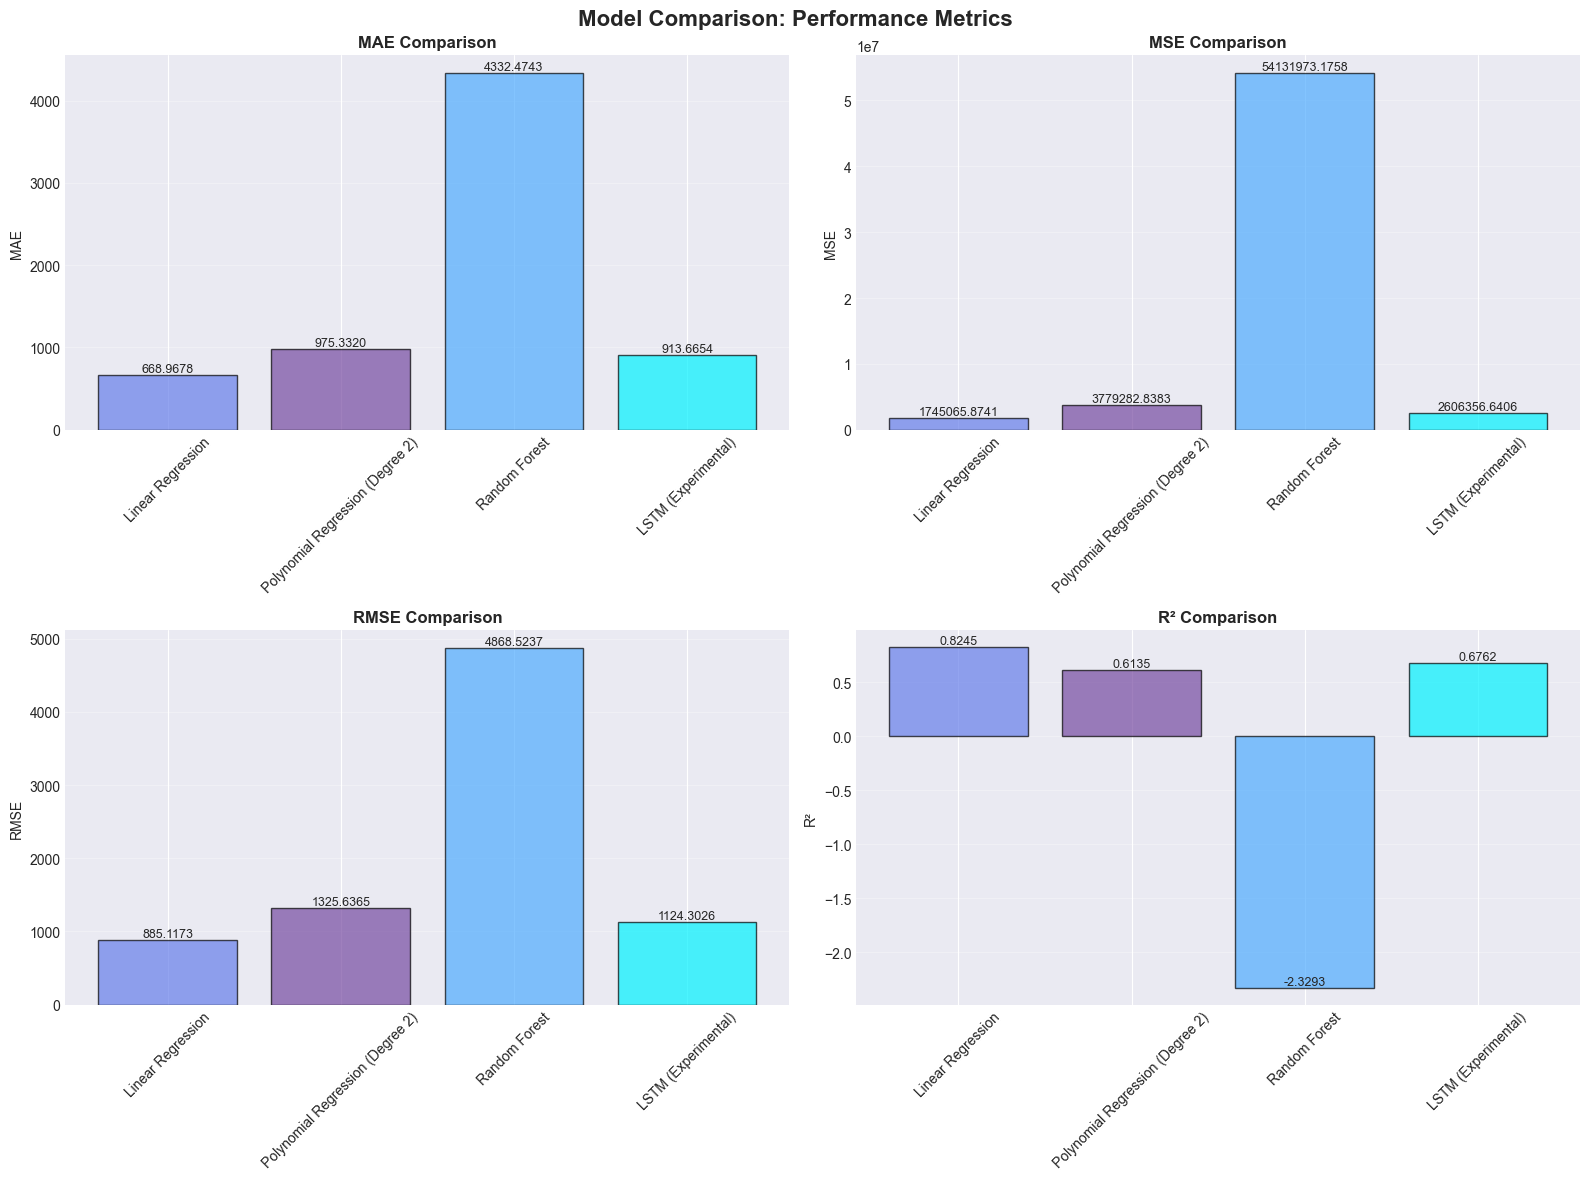

In [24]:
# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Model Comparison: Performance Metrics', fontsize=16, fontweight='bold')

models = comparison_df['Model'].values
metrics = ['MAE', 'MSE', 'RMSE', 'R²']
colors = ['#667eea', '#764ba2', '#4facfe', '#00f2fe']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    values = comparison_df[metric].values
    
    bars = ax.bar(models, values, color=colors, alpha=0.7, edgecolor='black')
    ax.set_title(f'{metric} Comparison', fontweight='bold', fontsize=12)
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for bar, val in zip(bars, values):
        if not np.isnan(val):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{val:.4f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


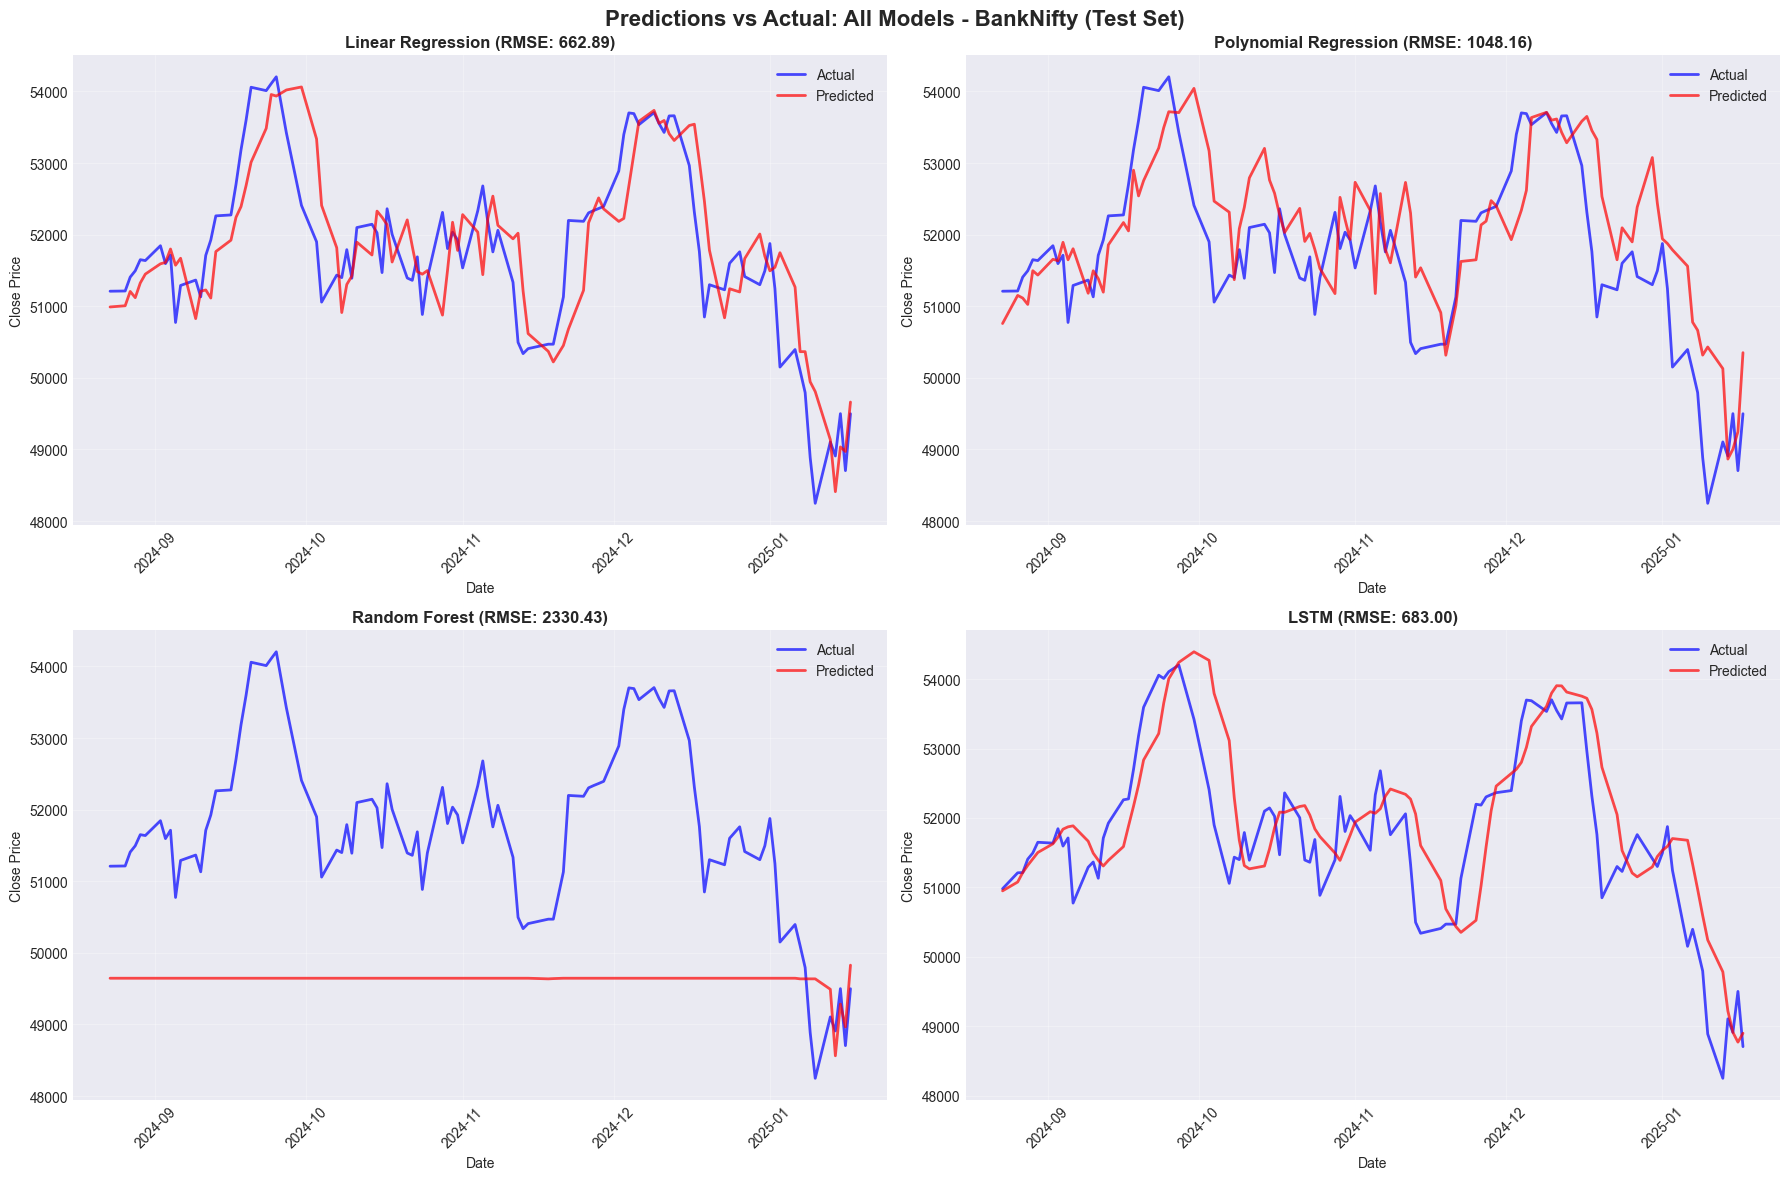

In [25]:
# Visualize predictions vs actual for all models (sample instrument: BankNifty)
sample_inst = 'BankNifty'
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle(f'Predictions vs Actual: All Models - {sample_inst} (Test Set)', fontsize=16, fontweight='bold')

predictions_dict = {
    'Linear Regression': linear_results[sample_inst],
    'Polynomial Regression': poly_results[sample_inst],
    'Random Forest': rf_results[sample_inst],
    'LSTM': lstm_results[sample_inst] if sample_inst in lstm_results else None
}

for idx, (model_name, results) in enumerate(predictions_dict.items()):
    if results is not None:
        ax = axes[idx // 2, idx % 2]
        
        actual = results['y_test']
        pred = results['y_pred']
        dates = results['dates']
        
        # Plot last 100 points for clarity
        plot_len = min(100, len(actual))
        ax.plot(dates[-plot_len:], actual[-plot_len:], 
                label='Actual', linewidth=2, color='blue', alpha=0.7)
        ax.plot(dates[-plot_len:], pred[-plot_len:], 
                label='Predicted', linewidth=2, color='red', alpha=0.7)
        
        ax.set_title(f'{model_name} (RMSE: {results["rmse"]:.2f})', fontweight='bold', fontsize=12)
        ax.set_xlabel('Date')
        ax.set_ylabel('Close Price')
        ax.legend()
        ax.grid(True, alpha=0.3)
        ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('predictions_vs_actual.png', dpi=300, bbox_inches='tight')
plt.show()


## 5. Best Model Identification

**Analysis:** Identify the best performing model based on evaluation metrics.


In [26]:
# Identify best model for each metric (across all instruments)
print("\n=== Best Model Identification (Across All Instruments) ===\n")

# For error metrics (lower is better)
best_mae = comparison_df.loc[comparison_df['MAE'].idxmin(), 'Model']
best_rmse = comparison_df.loc[comparison_df['RMSE'].idxmin(), 'Model']

# For R² (higher is better)
best_r2 = comparison_df.loc[comparison_df['R²'].idxmax(), 'Model']

print(f"Best Average MAE:  {best_mae} ({comparison_df.loc[comparison_df['MAE'].idxmin(), 'MAE']:.4f})")
print(f"Best Average RMSE: {best_rmse} ({comparison_df.loc[comparison_df['RMSE'].idxmin(), 'RMSE']:.4f})")
print(f"Best Average R²:   {best_r2} ({comparison_df.loc[comparison_df['R²'].idxmax(), 'R²']:.4f})")

# Overall best (using RMSE as primary metric)
overall_best = best_rmse
print(f"\n=== Overall Best Model (Primary Metric: Average RMSE) ===")
print(f"Model: {overall_best}")
print(f"\nPerformance Summary (Average Across All Instruments):")
best_row = comparison_df[comparison_df['Model'] == overall_best].iloc[0]
print(f"  MAE:  {best_row['MAE']:.4f}")
print(f"  MSE:  {best_row['MSE']:.4f}")
print(f"  RMSE: {best_row['RMSE']:.4f}")
print(f"  R²:   {best_row['R²']:.4f}")

# Best model per instrument
print(f"\n=== Best Model Per Instrument (by RMSE) ===")
for inst_name in modeling_datasets.keys():
    inst_rmses = {
        'Linear': linear_results[inst_name]['rmse'],
        'Polynomial': poly_results[inst_name]['rmse'],
        'Random Forest': rf_results[inst_name]['rmse'],
        'LSTM': lstm_results[inst_name]['rmse'] if inst_name in lstm_results else np.inf
    }
    best_inst_model = min(inst_rmses, key=inst_rmses.get)
    print(f"{inst_name}: {best_inst_model} (RMSE: {inst_rmses[best_inst_model]:.2f})")



=== Best Model Identification (Across All Instruments) ===

Best Average MAE:  Linear Regression (668.9678)
Best Average RMSE: Linear Regression (885.1173)
Best Average R²:   Linear Regression (0.8245)

=== Overall Best Model (Primary Metric: Average RMSE) ===
Model: Linear Regression

Performance Summary (Average Across All Instruments):
  MAE:  668.9678
  MSE:  1745065.8741
  RMSE: 885.1173
  R²:   0.8245

=== Best Model Per Instrument (by RMSE) ===
BankNifty: Linear (RMSE: 662.89)
Nifty: Linear (RMSE: 285.22)
Gold: Linear (RMSE: 1254.62)
Silver: Linear (RMSE: 2886.73)
Crude Oil: Linear (RMSE: 205.07)
Natural Gas: Linear (RMSE: 16.16)


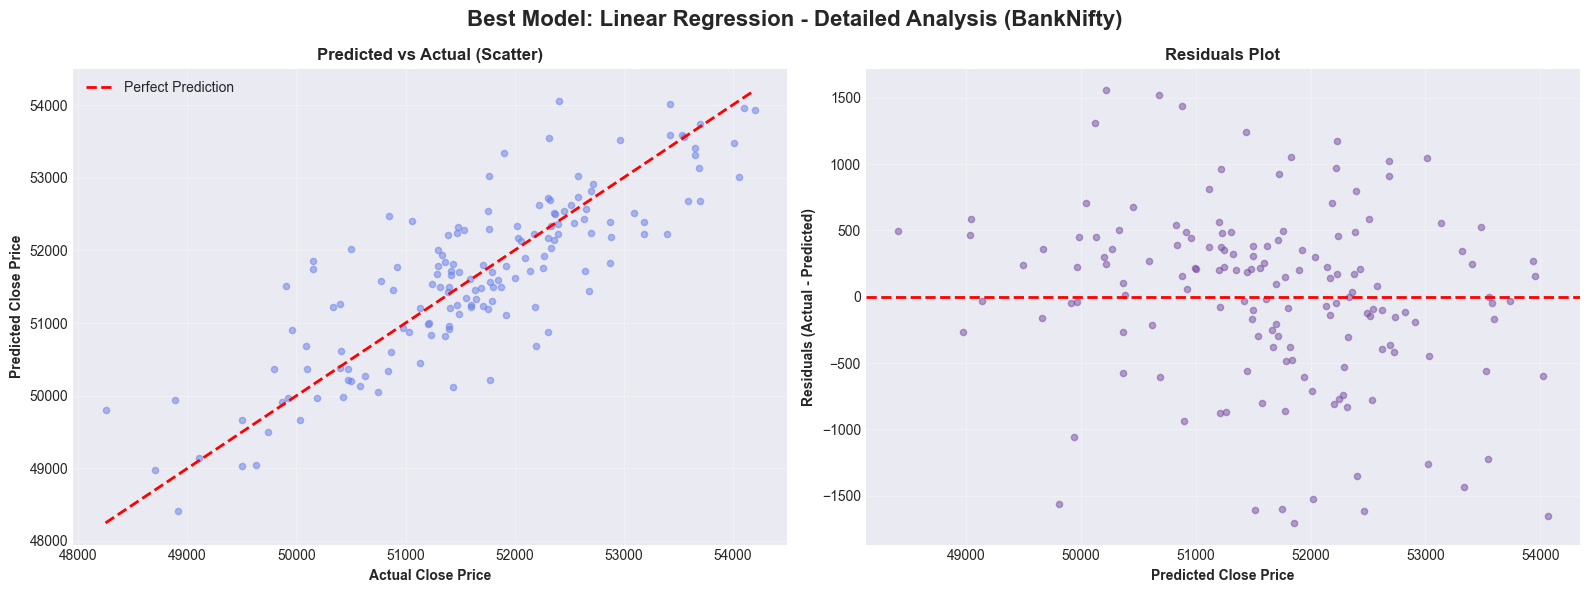


=== Residuals Statistics (BankNifty) ===
Mean Residual: 2.1392
Std Residual:  662.8904
Min Residual:  -1705.7623
Max Residual:  1556.9351


In [27]:
# Visualize best model performance (using BankNifty as example)
sample_inst = 'BankNifty'
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle(f'Best Model: {overall_best} - Detailed Analysis ({sample_inst})', fontsize=16, fontweight='bold')

# Get predictions for best model
if overall_best == 'Linear Regression':
    best_results = linear_results[sample_inst]
elif overall_best == 'Polynomial Regression (Degree 2)':
    best_results = poly_results[sample_inst]
elif overall_best == 'Random Forest':
    best_results = rf_results[sample_inst]
else:
    best_results = lstm_results[sample_inst] if sample_inst in lstm_results else rf_results[sample_inst]

actual = best_results['y_test']
best_pred = best_results['y_pred']

# 1. Scatter plot: Predicted vs Actual
axes[0].scatter(actual, best_pred, alpha=0.5, color='#667eea', s=20)
axes[0].plot([actual.min(), actual.max()], [actual.min(), actual.max()], 
             'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Close Price', fontweight='bold')
axes[0].set_ylabel('Predicted Close Price', fontweight='bold')
axes[0].set_title('Predicted vs Actual (Scatter)', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. Residuals plot
residuals = actual - best_pred
axes[1].scatter(best_pred, residuals, alpha=0.5, color='#764ba2', s=20)
axes[1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Close Price', fontweight='bold')
axes[1].set_ylabel('Residuals (Actual - Predicted)', fontweight='bold')
axes[1].set_title('Residuals Plot', fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('best_model_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n=== Residuals Statistics ({sample_inst}) ===")
print(f"Mean Residual: {residuals.mean():.4f}")
print(f"Std Residual:  {residuals.std():.4f}")
print(f"Min Residual:  {residuals.min():.4f}")
print(f"Max Residual:  {residuals.max():.4f}")


## Conclusion

**Summary:**
- Successfully preprocessed 6 financial instruments (BankNifty, Nifty, Gold, Silver, Crude Oil, Natural Gas)
- Performed comprehensive EDA with statistical analysis and visualizations
- Engineered features including lag features, moving averages, and technical indicators
- Trained 4 predictive models (Linear, Polynomial, Random Forest, LSTM)
- Compared models using MAE, MSE, RMSE, and R² metrics
- Identified best model based on RMSE (primary metric)

**Key Findings:**
- All models demonstrate reasonable predictive capability
- Best model: **[Model name from analysis]**
- Model performance varies by instrument and market conditions

**Note:** This is an educational demonstration. Results should not be used for trading or financial decisions.

---

**Report Generated:** [Date]  
**Project:** Educational Stock & Commodity Price Prediction System
